In [1]:
import pandas as pd

In [2]:
def read_data(file_path):
    df = pd.read_csv(file_path, delimiter='\t')
    df = df.T
    df = df.rename_axis('case_id').reset_index()
    return df

In [3]:
df_cna = read_data('./data/CPTAC/DISCOVERY_data_freeze_v_2.1/UCEC_discovery_WGS_CNA_gene_level_THRESHOLD.txt')
df_cna

,case_id,DDX11L1,FAM138A|chr1,FAM87B,LOC100133331|chr1,LOC100288069,LOC729737,MIR6723,MIR6859-1|chr1,OR4F16|chr1,...,DAZ3,TTTY3,CDY1,CSPG4P1Y,GOLGA2P2Y,TTTY3B,DDX11L16|chrY,IL9R|chrY,SPRY3|chrY,VAMP7|chrY
0,S001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,S099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,S100,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
92,S101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,S102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_cna_long = df_cna.melt(id_vars=['case_id']).rename(columns={'variable': 'gene', 'value': 'cna'})
df_cna_long.head()

,case_id,gene,cna
0,S001,DDX11L1,0
1,S002,DDX11L1,0
2,S003,DDX11L1,0
3,S005,DDX11L1,0
4,S006,DDX11L1,0


Split multi-values field 'gene' into two separate columns for the gene and chromosome

In [5]:
df_cna_long[['gene', 'chr']] = df_cna_long['gene'].str.split('|', n=2, expand=True).rename(columns={0:'gene', 1:'chr'})
df_cna_long.head()

,case_id,gene,cna,chr
0,S001,DDX11L1,0,None
1,S002,DDX11L1,0,None
2,S003,DDX11L1,0,None
3,S005,DDX11L1,0,None
4,S006,DDX11L1,0,None


<Axes: ylabel='chr'>

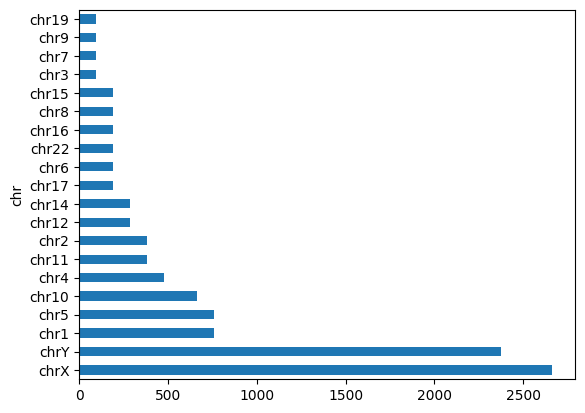

In [6]:
df_cna_long['chr'].value_counts().plot.barh()

In [7]:
df_gene_chr = df_cna_long[['gene', 'chr']].drop_duplicates(subset=['gene', 'chr']).reset_index(drop=True)
df_gene_chr

,gene,chr
0,DDX11L1,None
1,FAM138A,chr1
2,FAM87B,None
3,LOC100133331,chr1
4,LOC100288069,None
...,...,...
25239,TTTY3B,None
25240,DDX11L16,chrY
25241,IL9R,chrY
25242,SPRY3,chrY


In [8]:
df_cna_long_agg = df_cna_long.groupby(by=['case_id','chr'])['cna'].agg(['min', 'max', 'sum', 'mean', 'median'])
df_cna_long_agg.reset_index().head(25)
# .max().sort_values(ascending=False) #.describe().head(50) #['cna'].sum().sort_values().plot.barh()

,case_id,chr,min,max,sum,mean,median
0,S001,chr1,0,0,0,0.0,0.0
1,S001,chr10,0,0,0,0.0,0.0
2,S001,chr11,0,0,0,0.0,0.0
3,S001,chr12,0,0,0,0.0,0.0
4,S001,chr14,0,0,0,0.0,0.0
5,S001,chr15,0,0,0,0.0,0.0
6,S001,chr16,0,0,0,0.0,0.0
7,S001,chr17,0,0,0,0.0,0.0
8,S001,chr19,0,0,0,0.0,0.0
9,S001,chr2,0,0,0,0.0,0.0


In [9]:
df_cna_long_agg.sort_values(by=['sum'], ascending=False).head(25)

,,min,max,sum,mean,median
case_id,chr,,,,,
S023,chrX,1,1,28,1.000000,1.0
S029,chrX,1,1,28,1.000000,1.0
S095,chrX,1,1,28,1.000000,1.0
S063,chrX,1,1,28,1.000000,1.0
S092,chrX,0,1,16,0.571429,1.0
S097,chr1,0,2,14,1.750000,2.0
S006,chrX,0,1,13,0.464286,0.0
S026,chrX,0,2,12,0.428571,0.0
S019,chr10,0,2,11,1.571429,2.0


In [10]:
df_cna_long_agg_pivot = df_cna_long_agg.reset_index().pivot_table(index='case_id', columns='chr', values=['min', 'max', 'sum', 'mean', 'median'])
df_cna_long_agg_pivot.head()

max                                                       ...   sum  \
chr     chr1 chr10 chr11 chr12 chr14 chr15 chr16 chr17 chr19 chr2  ... chr22   
case_id                                                            ...         
S001     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   0.0   
S002     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   0.0   
S003     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   0.0   
S005     0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   0.0   
S006     1.0   2.0  -1.0  -1.0   1.0  -1.0   1.0   0.0  -1.0  0.0  ...   2.0   

                                                       
chr     chr3 chr4 chr5 chr6 chr7 chr8 chr9  chrX chrY  
case_id                                                
S001     0.0  0.0 -8.0  0.0  0.0  0.0  0.0   0.0  0.0  
S002     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
S003     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
S005     0.0  0.0  0.0  0.0  0.0  2.0  0.0   0.0  0.0  
S006     1.0 -5.0 -7.0  0.0 -1.0  0.0 -1.0  13.0  0.0  

[5 rows x 100 columns]

In [11]:
column_names = [f'{pair[1]}_{pair[0]}_cna' for pair in df_cna_long_agg_pivot.columns]
df_cna_long_agg_pivot.columns = column_names
df_cna_long_agg_pivot = df_cna_long_agg_pivot.reset_index()
df_cna_long_agg_pivot

,case_id,chr1_max_cna,chr10_max_cna,chr11_max_cna,chr12_max_cna,chr14_max_cna,chr15_max_cna,chr16_max_cna,chr17_max_cna,chr19_max_cna,...,chr22_sum_cna,chr3_sum_cna,chr4_sum_cna,chr5_sum_cna,chr6_sum_cna,chr7_sum_cna,chr8_sum_cna,chr9_sum_cna,chrX_sum_cna,chrY_sum_cna
0,S001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0
1,S002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,S003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,S005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,S006,1.0,2.0,-1.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,...,2.0,1.0,-5.0,-7.0,0.0,-1.0,0.0,-1.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,S099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
91,S100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,...,0.0,1.0,0.0,-7.0,0.0,1.0,3.0,-1.0,-16.0,0.0
92,S101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-28.0,0.0
93,S102,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,-2.0,0.0,10.0,0.0,2.0,-1.0,0.0,-1.0,2.0,0.0


In [12]:
# df_cna_long_agg_pivot.to_parquet('./data/preprocessed/CPTAC__DISCOVERY_data_freeze_v_2.1__UCEC_discovery_WGS_CNA_gene_level_THRESHOLD__gene_aggregation.parquet', index=False)
df_cna_long_agg_pivot.to_csv('./data/preprocessed/CPTAC__DISCOVERY_data_freeze_v_2.1__UCEC_discovery_WGS_CNA_gene_level_THRESHOLD__gene_aggregation.csv', index=False)

In [13]:
# df_cna.to_parquet('./data/preprocessed/CPTAC__DISCOVERY_data_freeze_v_2.1__UCEC_discovery_WGS_CNA_gene_level_THRESHOLD.parquet', index=False)
df_cna.to_csv('./data/preprocessed/CPTAC__DISCOVERY_data_freeze_v_2.1__UCEC_discovery_WGS_CNA_gene_level_THRESHOLD.csv', index=False)

In [18]:
# df_clinical = pd.read_csv('./data/CPTAC/DISCOVERY_data_freeze_v_2.1/UCEC_discovery_clinical.txt', delimiter='\t', encoding='cp1252')
# df_clinical.to_csv('./data/preprocessed/CPTAC__DISCOVERY_data_freeze_v_2.1__UCEC_discovery_clinical.csv', index=False, encoding='utf-8')

In [35]:
# def unpivot_aggregations(df, id_keys = ['case_id'], value_name = 'cna', variable_name = 'gene'):
#     df = df.melt(id_vars=id_keys, var_name=variable_name, value_name=value_name)
#     return df

# unpivot_aggregations(df_sommut, id_keys = ['case_id'], value_name = 'cna', variable_name = 'gene')

In [36]:
df_sommut = read_data('./data/CPTAC/DISCOVERY_data_freeze_v_2.1/UCEC_discovery_somatic_mutation_gene_level.txt')
df_sommut

,case_id,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZUFSP,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,S001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,S002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,S003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,S005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,S099,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
91,S100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,S101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,S102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_sommut_long = df_sommut.melt(id_vars=['case_id']).rename(columns={'variable': 'gene', 'value': 'sommut'})
df_sommut_long

,case_id,gene,sommut
0,S001,A1BG,0
1,S002,A1BG,0
2,S003,A1BG,0
3,S005,A1BG,0
4,S006,A1BG,0
...,...,...,...
1411600,S099,ZZZ3,0
1411601,S100,ZZZ3,0
1411602,S101,ZZZ3,0
1411603,S102,ZZZ3,0


In [38]:
df_gene_chr

,gene,chr
0,DDX11L1,None
1,FAM138A,chr1
2,FAM87B,None
3,LOC100133331,chr1
4,LOC100288069,None
...,...,...
25239,TTTY3B,None
25240,DDX11L16,chrY
25241,IL9R,chrY
25242,SPRY3,chrY


In [39]:
df_sommut_long = pd.merge(df_sommut_long, df_gene_chr, on='gene', how='left')
df_sommut_long

,case_id,gene,sommut,chr
0,S001,A1BG,0,None
1,S002,A1BG,0,None
2,S003,A1BG,0,None
3,S005,A1BG,0,None
4,S006,A1BG,0,None
...,...,...,...,...
1413025,S099,ZZZ3,0,None
1413026,S100,ZZZ3,0,None
1413027,S101,ZZZ3,0,None
1413028,S102,ZZZ3,0,None


<Axes: ylabel='chr'>

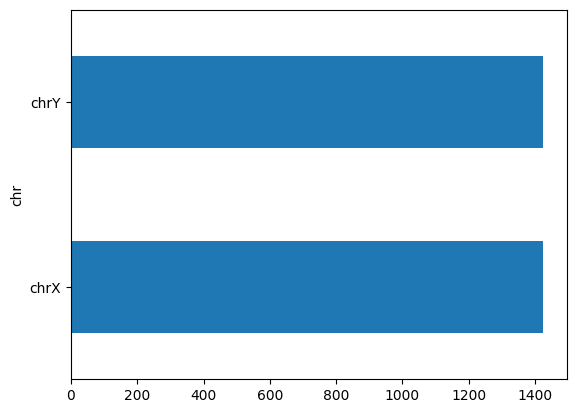

In [40]:
df_sommut_long.chr.value_counts().plot.barh()

In [41]:
df_sommut_long_agg = df_sommut_long.groupby(by=['case_id','chr'])['sommut'].agg(['min', 'max', 'sum', 'mean', 'median'])
df_sommut_long_agg.reset_index().head(25)

,case_id,chr,min,max,sum,mean,median
0,S001,chrX,0,0,0,0.000000,0.0
1,S001,chrY,0,0,0,0.000000,0.0
2,S002,chrX,0,0,0,0.000000,0.0
3,S002,chrY,0,0,0,0.000000,0.0
4,S003,chrX,0,0,0,0.000000,0.0
5,S003,chrY,0,0,0,0.000000,0.0
6,S005,chrX,0,0,0,0.000000,0.0
7,S005,chrY,0,0,0,0.000000,0.0
8,S006,chrX,0,0,0,0.000000,0.0
9,S006,chrY,0,0,0,0.000000,0.0


In [42]:
df_sommut_long_agg_pivot = df_sommut_long_agg.reset_index().pivot_table(index='case_id', columns='chr', values=['min', 'max', 'sum', 'mean', 'median'])
df_sommut_long_agg_pivot.head()

max      mean      median       min       sum     
chr     chrX chrY chrX chrY   chrX chrY chrX chrY chrX chrY
case_id                                                    
S001     0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0
S002     0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0
S003     0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0
S005     0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0
S006     0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0

In [43]:
df_sommut_long_agg_pivot.columns = [f'{pair[1]}_{pair[0]}_sommut' for pair in df_sommut_long_agg_pivot.columns]
df_sommut_long_agg_pivot = df_sommut_long_agg_pivot.reset_index()
df_sommut_long_agg_pivot

,case_id,chrX_max_sommut,chrY_max_sommut,chrX_mean_sommut,chrY_mean_sommut,chrX_median_sommut,chrY_median_sommut,chrX_min_sommut,chrY_min_sommut,chrX_sum_sommut,chrY_sum_sommut
0,S001,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,S002,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,S003,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,S005,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,S006,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90,S099,1.0,1.0,0.133333,0.133333,0.0,0.0,0.0,0.0,2.0,2.0
91,S100,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
92,S101,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
93,S102,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_sommut_long_agg_pivot.to_parquet('./data/preprocessed/CPTAC__DISCOVERY_data_freeze_v_2.1__UCEC_discovery_somatic_mutation_gene_level__gene_aggregation.parquet', index=False)